## Using PyTorch to build Neural Networks

In this notebook, we will leveraging the PyTorch Neural Network module (`torch.nn`)

In [1]:
from IPython.display import Image as IPythonImage
%matplotlib inline

import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
else:
  print('cpu')

Tesla T4


### Building a linear regression model

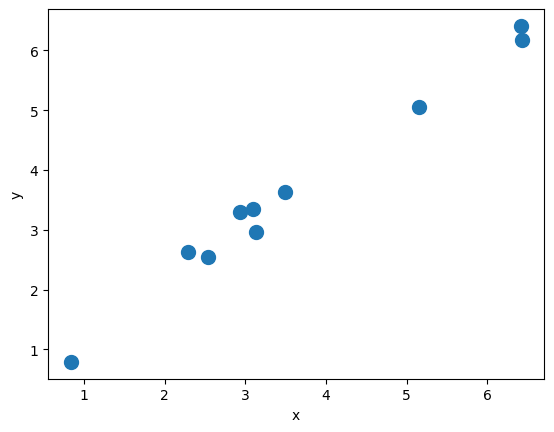

In [4]:

X_train = np.random.uniform(0, 9, size=(10, 1)).reshape(-1, 1).astype('float32')
noise = np.random.normal(0, 0.25, size=(10, 1)).astype('float32')

y_train = 1.0*X_train+noise


plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [5]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)

# On some computers the explicit cast to .float() is
# necessary
y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [6]:
torch.manual_seed(1) # sets the seed to generate random numbers

#------------------------------------------------------------------------------------------------
# Initialize the weights
weight = torch.randn(1) # argument specify shape of the tensor

# The following sets the requires_grad attribute of the tensor to True;
# PyTorch will track operations on this tensor, and gradients will be computed for it during backpropagation
weight.requires_grad_() # You want to optimize the parameter 'weight'

# Initialize the bias tensor filled with zeros with a shape of (1,), and it sets requires_grad=True
bias = torch.zeros(1, requires_grad=True)

# Try also weight = torch.randn(1, requires_grad=True)
#------------------------------------------------------------------------------------------------


def loss_fn(input, target):
    return (input-target).pow(2).mean()

def model(xb):
    # The @ operator denotes matrix multiplication (see PEP 465) / more readable than torch.matmul()
    return xb @ weight + bias

learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward() # After calling loss.backward(), the gradients are computed and stored in the .grad attributes of the tensors

        with torch.no_grad(): #  used to disable temporarily gradient tracking during the parameter update, memory efficiency
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate

            # Zeroing gradients after updating; essential to reset their gradients to zero for the next iteration of the training loop
            # By default, PyTorch accumulates gradients. If you don’t zero the gradients, they will accumulate over multiple iterations (batches)
            weight.grad.zero_()
            bias.grad.zero_()

    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}') # item() method used to retrieve the value of a scalar tensor as a standard Python number


Epoch 0  Loss 9.5583
Epoch 10  Loss 12.7966
Epoch 20  Loss 3.6506
Epoch 30  Loss 8.5834
Epoch 40  Loss 2.7614
Epoch 50  Loss 1.6168
Epoch 60  Loss 1.9484
Epoch 70  Loss 0.9772
Epoch 80  Loss 0.8479
Epoch 90  Loss 0.4779
Epoch 100  Loss 0.3836
Epoch 110  Loss 0.3927
Epoch 120  Loss 0.0268
Epoch 130  Loss 0.0073
Epoch 140  Loss 0.1387
Epoch 150  Loss 0.0047
Epoch 160  Loss 0.0887
Epoch 170  Loss 0.0960
Epoch 180  Loss 0.0856
Epoch 190  Loss 0.0602


Final Parameters: 1.617, 3.615


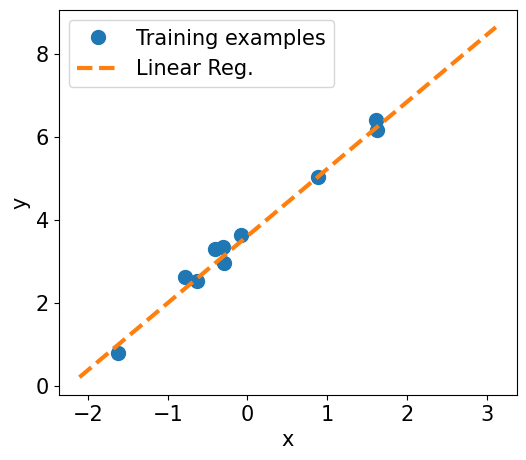

In [7]:
print(f"Final Parameters: {weight.item():1.3f}, {bias.item():1.3f}")

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

**Model training via `torch.nn` and `torch.optim` modules**

In [8]:
import torch.nn as nn

input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size).to(device)

loss_fn = nn.MSELoss(reduction='mean')

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:

        x_batch = x_batch.to(device)  # Move to GPU
        y_batch = y_batch.to(device)  # Move to GPU

        # 1. Generate predictions
        pred = model(x_batch)[:,0]

        # 2. Calculate loss
        loss = loss_fn(pred, y_batch.view(-1))

        # 3. Compute gradients
        loss.backward()

        # 4. Update parameters using gradients
        optimizer.step()

        # 5. Reset the gradients to zero
        optimizer.zero_grad()

    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 10.1449
Epoch 10  Loss 19.9749
Epoch 20  Loss 13.2688
Epoch 30  Loss 13.8637
Epoch 40  Loss 1.3928
Epoch 50  Loss 0.0070
Epoch 60  Loss 1.2209
Epoch 70  Loss 0.9744
Epoch 80  Loss 0.1476
Epoch 90  Loss 0.0284
Epoch 100  Loss 1.0836
Epoch 110  Loss 0.7530
Epoch 120  Loss 0.2270
Epoch 130  Loss 0.0053
Epoch 140  Loss 0.0016
Epoch 150  Loss 0.0002
Epoch 160  Loss 0.0001
Epoch 170  Loss 0.0007
Epoch 180  Loss 0.0783
Epoch 190  Loss 0.0000


Final Parameters:, 1.7936, 4.7006


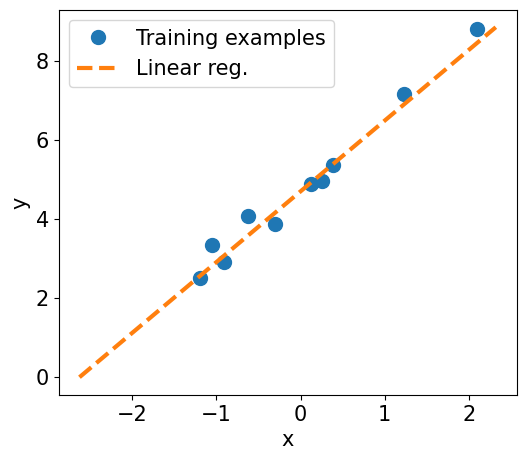

In [9]:
print(f"Final Parameters:, {model.weight.item():1.4f}, {model.bias.item():1.4f}")

X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm.to(device)).detach() #  detach() creates a new tensor deached from the computation graph; it shares the same data as the original tensor but does not require gradients



if(device.type == 'cuda'):

  # Move the test data and predictions to CPU for plotting
  X_test_norm = X_test_norm.cpu().numpy()  # Move to CPU
  y_pred = y_pred.cpu().numpy()  # Move to CPU

else:
  X_test_norm = X_test_norm.detach().numpy()
  y_pred = y_pred.detach().numpy()



fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm.detach().numpy(), y_train.detach().numpy(), 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)


plt.show()




---



### Exercise: train a regression model for the following polynomial *dataset*

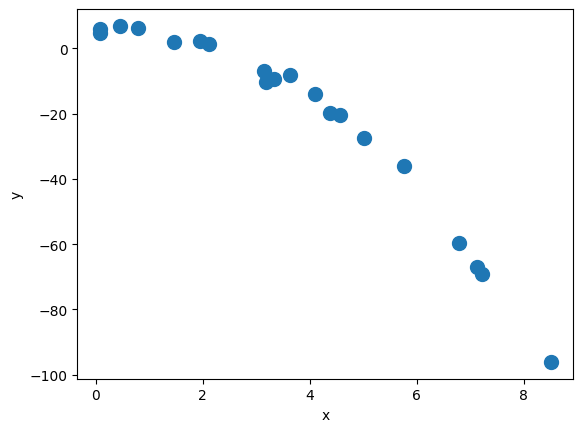

(20, 1) (20, 1)


In [13]:
X_train = np.random.uniform(0, 9, size=(20, 1)).reshape(-1, 1).astype('float32')
noise = np.random.normal(0, 2., size=(20, 1)).astype('float32')

b = 5
a1 = 1.0
a2 = -1.5

y_train =  b + a1*X_train + a2*X_train**2 + noise


plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

print(np.shape(X_train), np.shape(y_train))

In [14]:
### Augment training dataset

# Create the squared feature
X_train_squared = X_train ** 2

# Concatenate the original and squared features
X_train_augmented = np.concatenate((X_train, X_train_squared), axis=1)


#print(np.shape(X_train), np.shape(X_train_augmented), np.shape(y_train))
#print(type(X_train_augmented), type(y_train))

#print(X_train_augmented)
#print(y_train)

In [15]:
# Normalize each feature independently
mean_poly = np.mean(X_train_augmented, axis=0)
std_poly = np.std(X_train_augmented, axis=0)

print(np.shape(mean_poly), np.shape(std_poly))

X_train_norm = (X_train_augmented - mean_poly) / std_poly
X_train_norm = torch.from_numpy(X_train_norm)  # Convert to PyTorch tensor

print(np.shape(X_train_norm), np.shape(y_train))
print(type(X_train_norm), type(y_train))

# On some computers the explicit cast to .float() is
# necessary
y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)


(2,) (2,)
torch.Size([20, 2]) (20, 1)
<class 'torch.Tensor'> <class 'numpy.ndarray'>


In [16]:
num_epochs = 1000
learning_rate = 0.005

input_size = 2
output_size = 1
model_poly = nn.Linear(input_size, output_size)

loss_fn = nn.MSELoss(reduction='mean')

optimizer = torch.optim.SGD(model_poly.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. Generate predictions
        pred = model_poly(x_batch)

        # 2. Calculate loss
        loss = loss_fn(pred, y_batch)

        # 3. Compute gradients
        loss.backward()

        # 4. Update parameters using gradients
        optimizer.step()

        # 5. Reset the gradients to zero
        optimizer.zero_grad()

    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 32.6632
Epoch 10  Loss 21.3791
Epoch 20  Loss 12.2827
Epoch 30  Loss 14.2199
Epoch 40  Loss 2.7825
Epoch 50  Loss 1.9159
Epoch 60  Loss 4.0776
Epoch 70  Loss 1.5430
Epoch 80  Loss 5.6205
Epoch 90  Loss 1.1090
Epoch 100  Loss 1.4345
Epoch 110  Loss 0.6745
Epoch 120  Loss 0.9173
Epoch 130  Loss 6.0047
Epoch 140  Loss 0.2339
Epoch 150  Loss 5.2286
Epoch 160  Loss 8.5513
Epoch 170  Loss 0.1107
Epoch 180  Loss 0.5295
Epoch 190  Loss 4.2979
Epoch 200  Loss 0.2902
Epoch 210  Loss 0.0037
Epoch 220  Loss 1.0230
Epoch 230  Loss 11.6687
Epoch 240  Loss 1.2393
Epoch 250  Loss 5.7212
Epoch 260  Loss 0.0315
Epoch 270  Loss 5.3659
Epoch 280  Loss 1.8254
Epoch 290  Loss 0.3921
Epoch 300  Loss 1.7461
Epoch 310  Loss 0.3447
Epoch 320  Loss 0.0131
Epoch 330  Loss 2.5676
Epoch 340  Loss 0.8876
Epoch 350  Loss 2.3693
Epoch 360  Loss 13.3046
Epoch 370  Loss 1.0644
Epoch 380  Loss 3.2778
Epoch 390  Loss 1.1224
Epoch 400  Loss 0.2113
Epoch 410  Loss 3.8464
Epoch 420  Loss 0.2942
Epoch 430  Loss 

In [18]:
print(next(model_poly.parameters()).device)

cpu


Final Parameters:, 1.5969, 3.6132


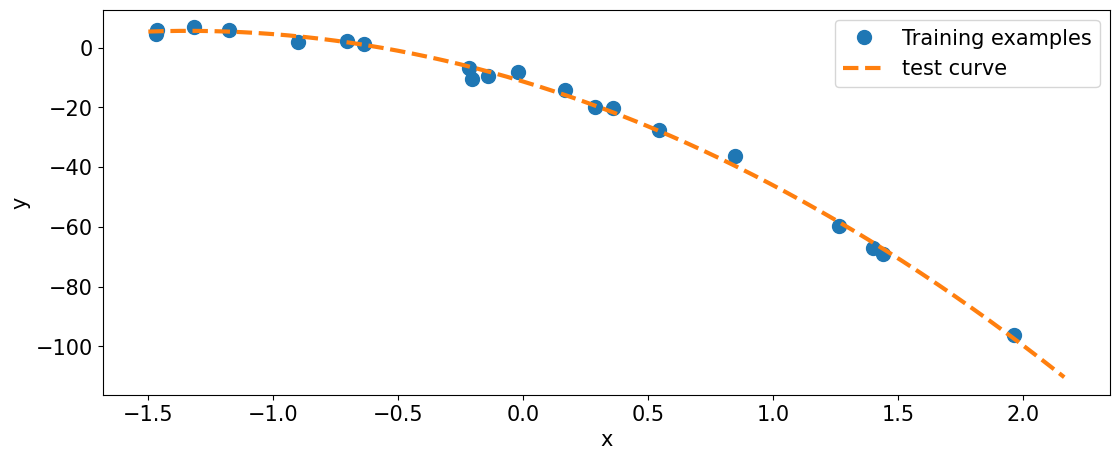

torch.Size([1000, 2]) torch.Size([1000, 1])


In [17]:
print(f"Final Parameters:, {model.weight.item():1.4f}, {model.bias.item():1.4f}")

X_test = np.linspace(0, 9, num=1000, dtype='float32').reshape(-1, 1)

# Create the squared feature
X_test_squared = X_test ** 2

# Concatenate the original and squared features
X_test_augmented = np.concatenate((X_test, X_test_squared), axis=1)

X_test_norm = (X_test_augmented - mean_poly) / std_poly
X_test_norm = torch.from_numpy(X_test_norm)
y_test_pred = model_poly(X_test_norm).detach() #  detach() creates a new tensor deached from the computation graph; it shares the same data as the original tensor but does not require gradients


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(X_train_norm.detach()[:,0].numpy(), y_train.detach().numpy(), 'o', markersize=10)
plt.plot(X_test_norm.detach()[:,0].numpy(), y_test_pred.detach().numpy(), '--', lw=3)
plt.legend(['Training examples', 'test curve'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)


plt.show()

print(np.shape(X_test_norm), np.shape(y_test_pred))




---



### Building an MLP for Classification

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1)

In [20]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [21]:
# For a list of all available layers http://pytorch.org/docs/stable/nn.html


class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x

input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3

model = Model(input_size, hidden_size, output_size).to(device)  # Move model to GPU


learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

# Adam -Adaptive Moment Estimation- optimizer:
# It combines the benefits of AdaGrad and RMSProp
# More details can be found in https://github.com/cfteach/ml4hep/blob/main/gradient/gradient_descent.ipynb
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [22]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs


for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:

        # Move batch to GPU
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()

    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)




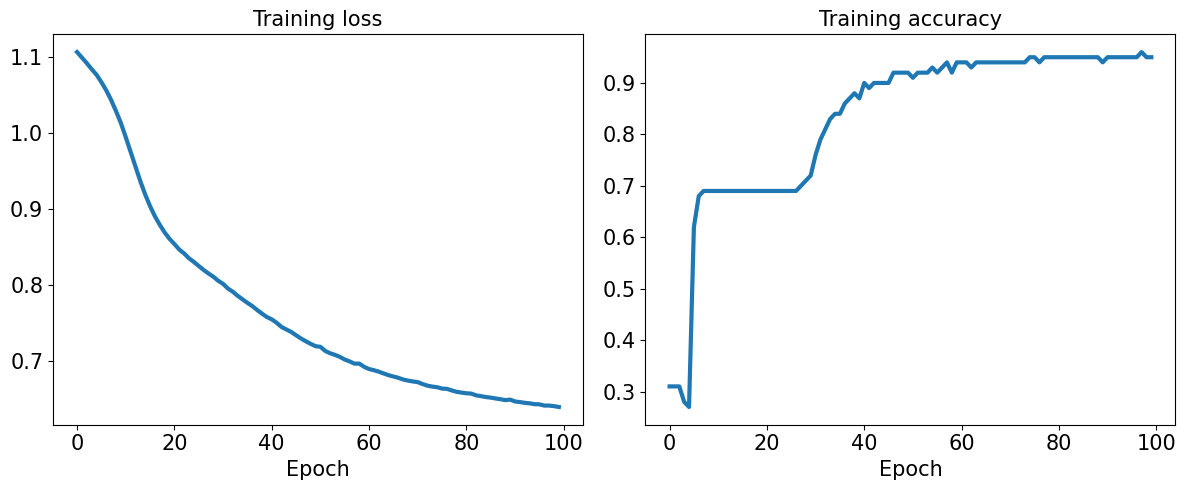

In [27]:


if device.type == 'cuda':
  accuracy_hist = [acc.cpu() for acc in accuracy_hist]



fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

plt.show()


**Accuracy for test dataset**

In [36]:
# Normalize X_test
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float().to(device)  # Move to device

# Check if y_test is already a tensor and move it to the device
if isinstance(y_test, torch.Tensor):
    y_test = y_test.to(device)  # Move to device
else:
    y_test = torch.from_numpy(y_test).float().to(device)  # Convert from numpy if not already a tensor

# Make predictions
pred_test = model(X_test_norm)

# Move pred_test to CPU if necessary for processing, but ensure both are on the same device
if device.type == 'cuda':
    pred_test = pred_test.cpu()  # Move predictions to CPU

# Make sure y_test is on the same device as pred_test
if y_test.device != pred_test.device:
    y_test = y_test.cpu()  # Move y_test to CPU if needed

# Calculate accuracy
correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Acc.: {accuracy:.4f}')


Test Acc.: 0.9800


### Saving and reloading the trained model

In [ ]:
path = 'iris_classifier.pt'
torch.save(model, path)

In [ ]:
model_new = torch.load(path)
model_new.eval()

<ipython-input-68-ddbeb3503457>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_new = torch.load(path)


Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [ ]:
pred_test = model_new(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800


In [ ]:
#if you want to save only the learned parameters

path = 'iris_classifier_state.pt'
torch.save(model.state_dict(), path)

In [ ]:
model_new = Model(input_size, hidden_size, output_size)
model_new.load_state_dict(torch.load(path))


<ipython-input-71-b21dbd0d4824>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_new.load_state_dict(torch.load(path))


<All keys matched successfully>

In [ ]:
pred_test = model_new(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800




---



### Exercise: train a classification model with 2 (or more) hidden layers

In [ ]:
# For a list of all available layers http://pytorch.org/docs/stable/nn.html


class Model2(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.layer3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Sigmoid()(x)
        x = self.layer3(x)
        x = nn.Softmax(dim=1)(x)
        return x

input_size = X_train_norm.shape[1]
hidden_size1 = 16
hidden_size2 = 8
output_size = 3

model2 = Model2(input_size, hidden_size1, hidden_size2, output_size)

learning_rate = 0.001

loss_fn = nn.CrossEntropyLoss()
# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

# Adam -Adaptive Moment Estimation- optimizer:
# It combines the benefits of AdaGrad and RMSProp
# More details can be found in https://github.com/cfteach/ml4hep/blob/main/gradient/gradient_descent.ipynb
optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)


In [ ]:
num_epochs = 100
loss_hist2 = [0] * num_epochs
accuracy_hist2 = [0] * num_epochs
accuracy_test_hist2 = [0] * num_epochs


for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model2(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        loss_hist2[epoch] += loss.item()*y_batch.size(0)  # item() method used to retrieve the value of a scalar tensor as a standard Python number
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist2[epoch] += is_correct.sum()

    pred_test = model2(X_test_norm)
    is_correct_test = (torch.argmax(pred_test, dim=1) == y_test).float()
    accuracy_test_hist2[epoch] = is_correct_test.sum()/len(X_test)

    loss_hist2[epoch] /= len(train_dl.dataset)
    accuracy_hist2[epoch] /= len(train_dl.dataset)



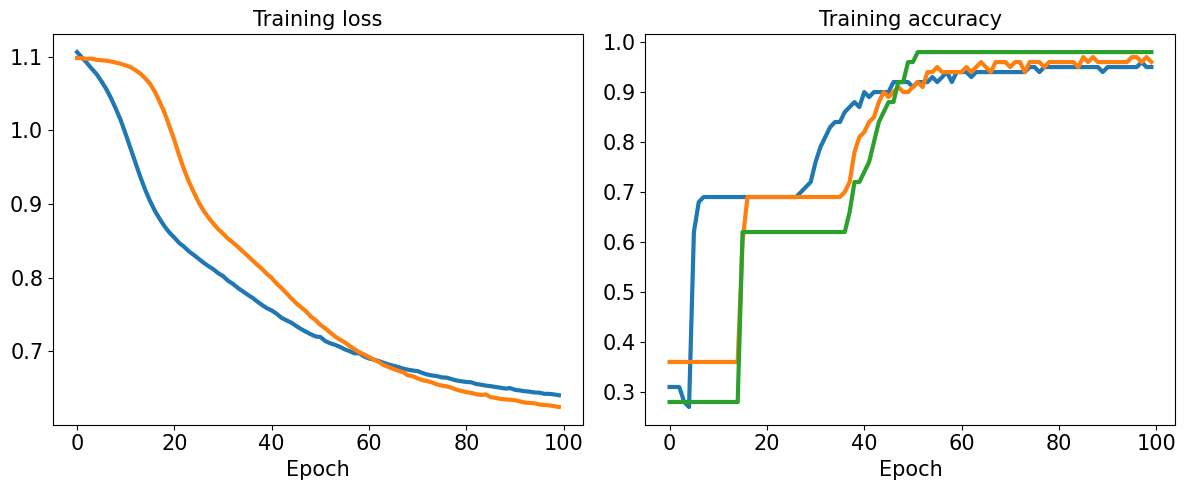

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.plot(loss_hist2, lw=3)


ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.plot(accuracy_hist2, lw=3)
ax.plot(accuracy_test_hist2, lw=3)

plt.tight_layout()

#plt.savefig('figures/12_09.pdf')

plt.show()

In [ ]:
path2 = 'iris_classifier2.pt'
torch.save(model2, path2)

model_new2 = torch.load(path2)
model_new2.eval()


<ipython-input-94-c7c89b18bad7>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_new2 = torch.load(path2)


Model2(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=8, bias=True)
  (layer3): Linear(in_features=8, out_features=3, bias=True)
)

In [ ]:
pred_test = model_new(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Acc.: {accuracy:.12f}')


pred_test = model_new2(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()

print(f'Test Acc.: {accuracy:.12f}')

Test Acc.: 0.980000019073
Test Acc.: 0.980000019073


### **Appendix**

### Choosing activation functions for MLP


**Logistic function recap**

In [ ]:
import numpy as np

X = np.array([1, 1.4, 2.5]) ## first value must be 1
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print(f'P(y=1|x) = {logistic_activation(X, w):.3f}')

P(y=1|x) = 0.888


In [ ]:
# W : array with shape = (n_output_units, n_hidden_units+1)
# note that the first column are the bias units

W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

# A : data array with shape = (n_hidden_units + 1, n_samples)
# note that the first column of this array must be 1

A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('Net Input: \n', Z)

print('Output Units:\n', y_probas)

Net Input: 
 [1.78 0.76 1.65]
Output Units:
 [0.85569687 0.68135373 0.83889105]


In [ ]:
y_class = np.argmax(Z, axis=0)
print('Predicted class label:', y_class)

Predicted class label: 0


**Estimating class probabilities in multiclass classification via the softmax function**

In [ ]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('Probabilities:\n', y_probas)

np.sum(y_probas)

Probabilities:
 [0.44668973 0.16107406 0.39223621]


1.0

In [ ]:
torch.softmax(torch.from_numpy(Z), dim=0)

tensor([0.4467, 0.1611, 0.3922], dtype=torch.float64)

**Broadening the output spectrum using a hyperbolic tangent**

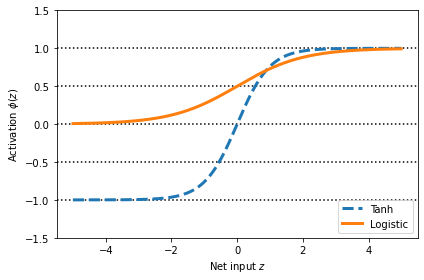

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('Net input $z$')
plt.ylabel('Activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act,
    linewidth=3, linestyle='--',
    label='Tanh')
plt.plot(z, log_act,
    linewidth=3,
    label='Logistic')
plt.legend(loc='lower right')
plt.tight_layout()

plt.show()

In [ ]:
np.tanh(z)

array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])

In [ ]:
torch.tanh(torch.from_numpy(z))


tensor([-0.9999, -0.9999, -0.9999,  ...,  0.9999,  0.9999,  0.9999],
       dtype=torch.float64)

In [ ]:
from scipy.special import expit

expit(z)

array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383])

In [ ]:
torch.sigmoid(torch.from_numpy(z))

tensor([0.0067, 0.0067, 0.0068,  ..., 0.9932, 0.9932, 0.9933],
       dtype=torch.float64)

**Rectified linear unit activation**

In [ ]:
torch.relu(torch.from_numpy(z))

tensor([0.0000, 0.0000, 0.0000,  ..., 4.9850, 4.9900, 4.9950],
       dtype=torch.float64)